# 2. weather.csv Cleaning

This Jupyter Notebook will be focusing on cleaning the weather.csv file.

### Weather Data

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. <br>
This dataset is from NOAA of the weather conditions of 2007 to 2014. 

<strong> Station 1: </strong> CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level <br>
<strong> Station 2: </strong> CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

Lets clean this weather data!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

sns.set_style()
%matplotlib inline

In [2]:
df = pd.read_csv('../data/weather.csv')
df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [3]:
print(f'# of Rows in DataFrame: {df.shape[0]} \n# of Columns in DataFrame: {df.shape[1]}')
print('# of Null Values: ', df.isnull().sum().sum())

# of Rows in DataFrame: 2944 
# of Columns in DataFrame: 22
# of Null Values:  0


In [4]:
object_columns = df.select_dtypes(include = object).head(0).columns
print('# of columns we need to look at because they are objects',
      object_columns.shape[0])

# of columns we need to look at because they are objects 16


In [5]:
# A quick look at the head() to see what's going on with these Object Columns
# There are M for missing values
# There are - for missing values
df.select_dtypes(include = object).head()

,Date,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
0,2007-05-01,67,14,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,9.2
1,2007-05-01,68,M,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,9.6
2,2007-05-02,51,-3,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.4
3,2007-05-02,52,M,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.4
4,2007-05-03,56,2,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.9


In [6]:
print('Numerical Columns: ', 
      df.select_dtypes(exclude = object).head(0).columns)

Numerical Columns:  Index(['Station', 'Tmax', 'Tmin', 'DewPoint', 'ResultSpeed', 'ResultDir'], dtype='object')


## Functions

In [7]:
def dropping_func(df, col_name, feature_to_drop):
    print(f'Size of df before dropping {feature_to_drop} in {col_name} : {df.shape[0]}')
    df = df[df[col_name] != feature_to_drop]
    print(f'Size of df after dropping {feature_to_drop} in {col_name} : {df.shape[0]}')
    return df

In [8]:
#This function fills the columns that are missing values from station 2 like station 1
def fill_like_station1(df, col_name, key_to_fill):
    for i, value in enumerate(df[col_name].values):
        if value == key_to_fill:
            df[col_name].values[i] = df[col_name].values[i-1]

## <span style="color:GoldenRod"> ** Exploring Object Columns

## <span style="color:GoldenRod"> Date


NOTES: 
    1. Each Date has 2 value counts
    2. 0 NA/Nulls
    3. Data Format: yyyy-mm-dd
    4. 1472 unqiue dates, each date 2x
    5. converted to datetime no longer object
    

In [9]:
# This value counts function shows that every date has 2 counts
df.Date.value_counts().head()

2011-10-23    2
2012-09-10    2
2008-08-20    2
2009-07-09    2
2012-10-27    2
Name: Date, dtype: int64

In [10]:
# This reensures the frequency (counts) is mainly 2 and nothing more than that
df.Date.describe()

count           2944
unique          1472
top       2011-10-23
freq               2
Name: Date, dtype: object

In [11]:
# This checks for Dates equal to 'M' which indicates a missing value
df[df.Date == 'M'].sum().sum()

0.0

In [12]:
# This converts the Date column to a datetime series
df['Date'] = pd.to_datetime(df.Date)

In [13]:
# The describe function shows the years begin from 2007 - 2014
df.Date.dt.year.describe()

count    2944.000000
mean     2010.500000
std         2.291677
min      2007.000000
25%      2008.750000
50%      2010.500000
75%      2012.250000
max      2014.000000
Name: Date, dtype: float64

In [14]:
# This sets the index to the Date so it'll be easier to sort by Date later
df.set_index('Date', inplace=True)

## <span style="color:GoldenRod"> Tavg


NOTE:
1. Tavg - Stands for Average Temperature in degree F - Appears to be (Tmax + Tmin)/2
2. 11 rows with (M = Missing) for Tavg, Heat, Cool

In [15]:
print('# of rows with eMpty values ', df[df.Tavg == 'M'].shape[0])

# of rows with eMpty values  11


In [16]:
# Lets just drop these 11 empty values
df = dropping_func(df, 'Tavg', 'M')

Size of df before dropping M in Tavg : 2944
Size of df after dropping M in Tavg : 2933


In [17]:
# Convert the tavg to integer
df['Tavg'] = df['Tavg'].astype(int)

## <span style="color:GoldenRod"> Depart


NOTE:
    1. There are exactly half the dataset with missing (M) data. 
    2. If it's station 2, it has an M.
    3. We decided to drop this column because we believe we have enough columns about temperature already

In [18]:
print('# of rows with Missing values ', df[df.Depart == 'M'].shape[0])

# of rows with Missing values  1461


In [19]:
df[(df.Station == 2) & (df.Depart == 'M')].shape

(1461, 21)

In [20]:
print('Size of df before Depart column dropped:', df.shape)
df.drop('Depart', axis=1, inplace=True)
print('Size of df after Depart column dropped:', df.shape)

Size of df before Depart column dropped: (2933, 21)
Size of df after Depart column dropped: (2933, 20)


## <span style="color:GoldenRod"> WetBulb


NOTE:
1. 4 missing values
2. Wet Bulb seems very close to the Dew Point, either drop the 4 missing values or use the other features to predict it.
3. Wet Bulb Temperature - Twb The Wet Bulb temperature is the adiabatic saturation temperature.
4. 100% humidity is when wet-bulb temp = air temp
5. Effects of humidity on mosquito longevity. Mosquitoes, like all insects, have a limited range of tolerable temperature and humidity [4]. ... Mosquitoes held without food or water survived for an average of 15.6 hours at 30% RH compared to 26.2 hours at 70% RH [8]

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3750695/

In [21]:
print('# of rows with Missing values ', df[df.WetBulb == 'M'].shape[0])

# of rows with Missing values  4


In [22]:
df[df.WetBulb == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,
2009-06-26,1,86,69,78,60,M,0,13,0418,1931,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2013-08-10,1,81,64,73,57,M,0,8,0454,1900,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2013-08-11,1,81,60,71,61,M,0,6,0455,1859,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2013-08-12,2,85,69,77,63,M,0,12,-,-,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [23]:
df = dropping_func(df, 'WetBulb', 'M')

Size of df before dropping M in WetBulb : 2933
Size of df after dropping M in WetBulb : 2929


In [24]:
# Check to make sure it is no longer in the dataframe
df[df.WetBulb == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,


In [25]:
# Convert the Wetbulb column to integer
df['WetBulb'] = df['WetBulb'].astype(int)

## <span style="color:GoldenRod"> Heat


NOTE:
    1. Missing 11 values
    2. consec

In [26]:
print('# of rows with Missing values ', df[df.Heat == 'M'].shape[0])

# of rows with Missing values  0


In [27]:
# Convert heat column to integer
df['Heat'] = df['Heat'].astype(int)

## <span style="color:GoldenRod"> Cool


NOTE:
    1. Missing 11 values

In [28]:
print('# of rows with Missing values ', df[df.Cool == 'M'].shape[0])

# of rows with Missing values  0


In [29]:
# Check to make sure there are no missing values
df[df.Cool == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,


In [30]:
# Convert Cool to integer
df['Cool'] = df['Cool'].astype(int)

## <span style="color:GoldenRod"> Sunrise


NOTE:
    1. 1472 rows have dashes are all from station 2
    2. Since this is the same city, the Sunrise should be about the same. So we made a for-loop to set the Sunrise to the same value as Station 1

In [31]:
print('# of rows with Dash values ', df[df.Sunrise == '-'].shape[0])

# of rows with Dash values  1460


In [32]:
fill_like_station1(df, 'Sunrise', '-')

In [33]:
df[['Sunrise']].head()

,Sunrise
Date,
2007-05-01,0448
2007-05-01,0448
2007-05-02,0447
2007-05-02,0447
2007-05-03,0446


In [34]:
# We decided not to use this code. But it is here for reference if we want to use it.
# convert to datetime if needed
# df['Sunrise'] = pd.to_datetime(df.Sunrise, format='%H%M')

# Convert to display only time
# df['Sunrise'] = df.Sunrise.dt.time

## <span style="color:GoldenRod"> Sunset


NOTE:
    1. 1472 rows have dashes only at Station 2
    2. Since this is the same city, the sunset should be about the same. So we made a for-loop to set the sunset to the same value as Station 1
    3. This data contains some times where the minutes is 60. This makes it difficult to convert the military time to datetime series. So we will leave it as an object before the merge.

In [35]:
print('# of rows with Dash values ', df[df.Sunset == '-'].shape[0])

# of rows with Dash values  1460


In [36]:
fill_like_station1(df, 'Sunset', '-')

In [37]:
df[['Sunset']].head()

,Sunset
Date,
2007-05-01,1849
2007-05-01,1849
2007-05-02,1850
2007-05-02,1850
2007-05-03,1851


## <span style="color:GoldenRod"> CodeSum


NOTE:
    1. Code for the weather condition
    2. Need to Get Dummies

In [38]:
print('# of rows with Missing values ', df[df.CodeSum == 'M'].shape[0])
df.CodeSum.value_counts().head()

# of rows with Missing values  0


              1601
RA             293
RA BR          237
BR             110
TSRA RA BR      92
Name: CodeSum, dtype: int64

In [39]:
df[(df.CodeSum == 'M') | (df.CodeSum == '-')]

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,


In [40]:
# This code splits the strings in CodeSum
df.CodeSum = df.CodeSum.apply(str.split)

In [41]:
# Creates a set of the codes
codes = {item for sublist in df.CodeSum for item in sublist}

In [42]:
# Creates empty colums of each code
for code in codes:
    df[code] = 0

In [43]:
# Fills in a 1 in each item column where the item exist in that day (index)
# Note this takes a while to run
for i, day_ in enumerate(df.CodeSum):
    for item in day_:
        if item != []:
            df[item].iloc[i] = 1

/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## <span style="color:GoldenRod"> Depth


NOTE:
    1. Station 2 only has missing values
    2. Drop this column

In [44]:
print('# of rows with Missing values ', df[df.Depth == 'M'].shape[0])

# of rows with Missing values  1460


In [45]:
df[(df.Station == 2) & (df.Depth == 'M')].shape

(1460, 36)

In [46]:
print('Size of df before Depth column dropped:', df.shape)
df.drop('Depth', axis=1, inplace=True)
print('Size of df after Depth column dropped:', df.shape)

Size of df before Depth column dropped: (2929, 36)
Size of df after Depth column dropped: (2929, 35)


## <span style="color:GoldenRod"> Water1


NOTE:
    1. nearly all rows is missing this value.
    2. Dropped the column

In [47]:
print('# of rows with Missing values ', df[df.Water1 == 'M'].shape[0])
print('Size of df before Water1 column dropped:', df.shape)
df.drop('Water1', axis=1,inplace=True)
print('Size of df after Water1 column dropped:', df.shape)


# of rows with Missing values  2929
Size of df before Water1 column dropped: (2929, 35)
Size of df after Water1 column dropped: (2929, 34)


## <span style="color:GoldenRod"> SnowFall


NOTE:
    1. 1470 are M
    2. 12 are T
    3. Can't resolve the T until resolve the M
    4. Again, Station 2 has the missing values.

In [48]:
print('# of rows with Missing values ', df[df.SnowFall == 'M'].shape[0])
df.SnowFall.value_counts()

# of rows with Missing values  1460


M      1460
0.0    1456
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [49]:
df[(df.Station == 2)].shape

(1460, 34)

In [50]:
df[(df.Station == 2) & (df.SnowFall == 'M')].head()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,BCFG,FG+,FG,TSRA,RA,TS,DZ,VCFG,VCTS,MIFG
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,2,84,52,68,51,57,0,3,0448,1849,...,0,0,0,0,0,0,0,0,0,0
2007-05-02,2,60,43,52,42,47,13,0,0447,1850,...,0,0,0,0,0,0,0,0,0,0
2007-05-03,2,67,48,58,40,50,7,0,0446,1851,...,0,0,0,0,0,0,0,0,0,0
2007-05-05,2,66,54,60,39,50,5,0,0443,1853,...,0,0,0,0,0,0,0,0,0,0
2007-05-06,2,68,52,60,30,46,5,0,0442,1855,...,0,0,0,0,0,0,0,0,0,0


In [51]:
fill_like_station1(df, 'SnowFall', 'M')

In [52]:
df[(df.Station == 2) & (df.SnowFall == 'M')]

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,BCFG,FG+,FG,TSRA,RA,TS,DZ,VCFG,VCTS,MIFG
Date,,,,,,,,,,,,,,,,,,,,,


In [53]:
df.SnowFall = df.SnowFall.map(lambda x: x.replace('T', '0.001')).astype(float)

## <span style="color:GoldenRod"> PrecipTotal


NOTE:
    1. 318 T for trace
    2. 2 M for missing, only 2 will drop them

In [54]:
print('# of rows with Missing values ', df[df.PrecipTotal == 'M'].shape[0])

# of rows with Missing values  2


In [55]:
df[df.PrecipTotal == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,BCFG,FG+,FG,TSRA,RA,TS,DZ,VCFG,VCTS,MIFG
Date,,,,,,,,,,,,,,,,,,,,,
2007-06-28,2,73,61,67,56,61,0,2,0419,1931,...,0,0,0,0,0,0,0,0,0,0
2007-06-29,2,71,56,64,56,60,1,0,0419,1931,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df = dropping_func(df, 'PrecipTotal', 'M')

Size of df before dropping M in PrecipTotal : 2929
Size of df after dropping M in PrecipTotal : 2927


In [57]:
df[df.PrecipTotal == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,BCFG,FG+,FG,TSRA,RA,TS,DZ,VCFG,VCTS,MIFG
Date,,,,,,,,,,,,,,,,,,,,,


In [58]:
df.PrecipTotal.value_counts().head()

0.00    1570
  T      317
0.01     126
0.02      63
0.03      46
Name: PrecipTotal, dtype: int64

This function replace the value T in the column PrecipTotal to 0.001 for trace amount of precipitation

In [59]:
df.PrecipTotal = df.PrecipTotal.map(lambda x: x.replace('T', '0.001')).astype(float)

In [60]:
df.PrecipTotal.value_counts().head()

0.000    1570
0.001     317
0.010     126
0.020      63
0.030      46
Name: PrecipTotal, dtype: int64

Validate the is no longer an object

In [61]:
df.PrecipTotal.dtype

dtype('float64')

## <span style="color:GoldenRod"> StnPressure


NOTE:
    1. 4 value M in StnPressure
    2. Drop them
    3. What is StnPressure and mosquito relationship?

In [62]:
print('# of rows with Missing values ', df[df.StnPressure == 'M'].shape[0])

# of rows with Missing values  2


In [63]:
#Used to view the value M in StnPressure
#df[df.StnPressure == 'M']

In [64]:
df = dropping_func(df, 'StnPressure', 'M')

Size of df before dropping M in StnPressure : 2927
Size of df after dropping M in StnPressure : 2925


In [65]:
df['StnPressure'] = df['StnPressure'].astype(float)

## <span style="color:GoldenRod"> SeaLevel


NOTE:
    1. 9 values with M
    2. What does sealevel have to do with mosquitoes?
    3. Should we drop these?

In [66]:
print('# of rows with Missing values ', df[df.SeaLevel == 'M'].shape[0])

# of rows with Missing values  7


In [67]:
#Used to view the missing 9
#df[df.SeaLevel == 'M']

In [68]:
df = dropping_func(df, 'SeaLevel', 'M')

Size of df before dropping M in SeaLevel : 2925
Size of df after dropping M in SeaLevel : 2918


In [69]:
df['SeaLevel'] = df['SeaLevel'].astype(float)

## <span style="color:GoldenRod"> AvgSpeed


NOTE:
    1. Only 3 missing values
    2. dropped them

In [70]:
print('# of rows with Missing values ', df[df.AvgSpeed == 'M'].shape[0])

# of rows with Missing values  0


In [71]:
#displays the 3 rows with the M value in AvgSpeed Column
df[df.AvgSpeed == 'M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,...,BCFG,FG+,FG,TSRA,RA,TS,DZ,VCFG,VCTS,MIFG
Date,,,,,,,,,,,,,,,,,,,,,


In [72]:
#df = dropping_func(df, 'AvgSpeed', 'M')

In [73]:
#Converts AvgSpeed to Float
df.AvgSpeed = df.AvgSpeed.astype(float)

In [74]:
#Confirming the types is change to float
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2918 entries, 2007-05-01 to 2014-10-31
Data columns (total 34 columns):
Station        2918 non-null int64
Tmax           2918 non-null int64
Tmin           2918 non-null int64
Tavg           2918 non-null int64
DewPoint       2918 non-null int64
WetBulb        2918 non-null int64
Heat           2918 non-null int64
Cool           2918 non-null int64
Sunrise        2918 non-null object
Sunset         2918 non-null object
CodeSum        2918 non-null object
SnowFall       2918 non-null float64
PrecipTotal    2918 non-null float64
StnPressure    2918 non-null float64
SeaLevel       2918 non-null float64
ResultSpeed    2918 non-null float64
ResultDir      2918 non-null int64
AvgSpeed       2918 non-null float64
HZ             2918 non-null int64
BR             2918 non-null int64
SQ             2918 non-null int64
FU             2918 non-null int64
GR             2918 non-null int64
SN             2918 non-null int64
BCFG           2918 

## <span style="color:Green"> Exploring Numerical Columns


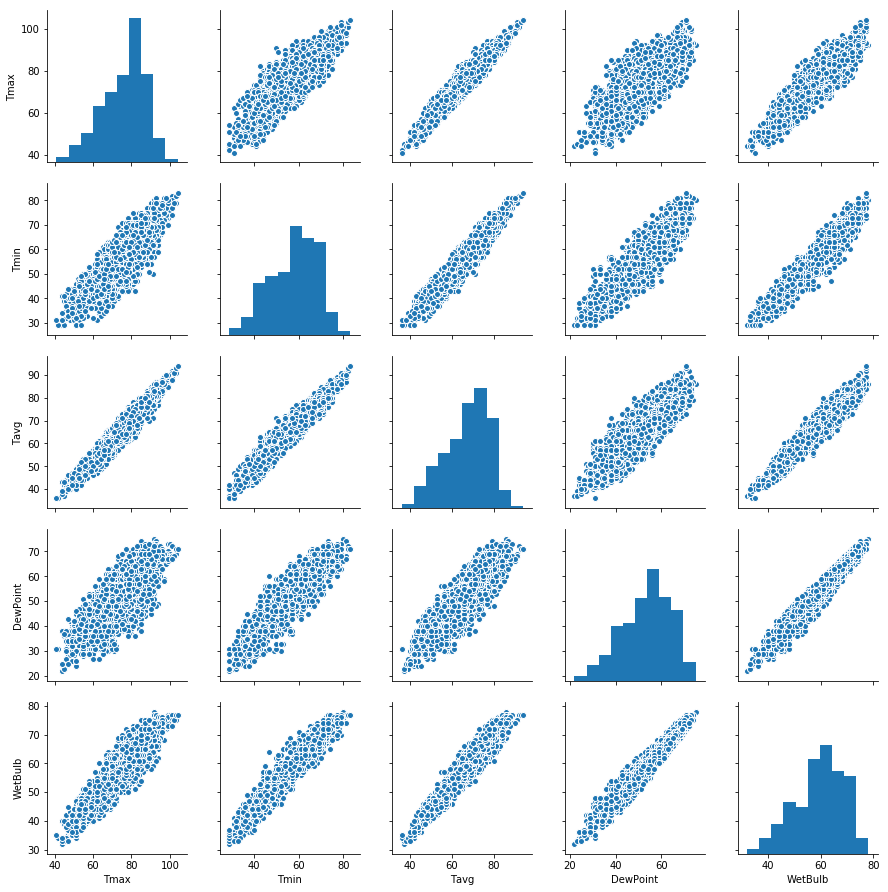

In [75]:
sns.pairplot(df[['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb']]);

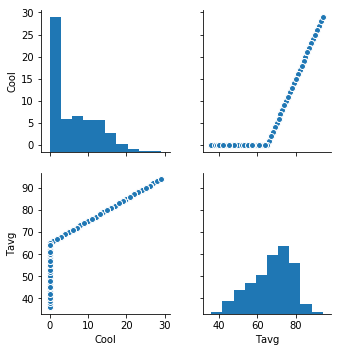

In [76]:
sns.pairplot(df[['Cool', 'Tavg']])

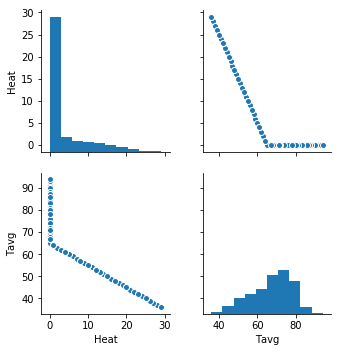

In [77]:
sns.pairplot(df[['Heat', 'Tavg']])

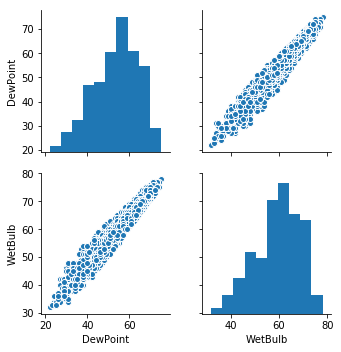

In [78]:
sns.pairplot(df[['DewPoint', 'WetBulb']])

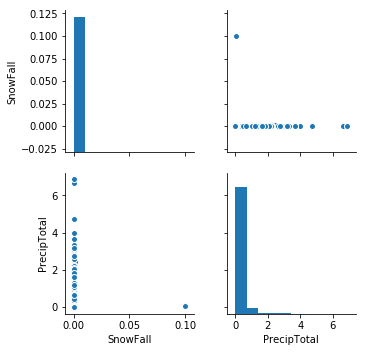

In [79]:
sns.pairplot(df[['SnowFall', 'PrecipTotal']])

In [80]:
print('Numerical Columns: ', 
      df.select_dtypes(exclude = object).head(0).columns)

Numerical Columns:  Index(['Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
       'Cool', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'HZ', 'BR', 'SQ', 'FU', 'GR',
       'SN', 'BCFG', 'FG+', 'FG', 'TSRA', 'RA', 'TS', 'DZ', 'VCFG', 'VCTS',
       'MIFG'],
      dtype='object')


## Exploring the Data

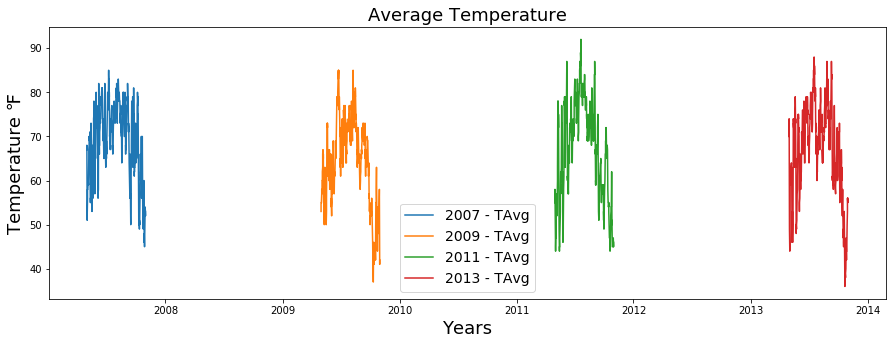

In [81]:
f, ax = plt.subplots(figsize = (15, 5))
plt.title('Average Temperature', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Temperature ℉', fontsize = 18)
plt.plot(df['2007'].Tavg, label='2007 - TAvg')
plt.plot(df['2009'].Tavg, label='2009 - TAvg')
plt.plot(df['2011'].Tavg, label='2011 - TAvg')
plt.plot(df['2013'].Tavg, label='2013 - TAvg')
plt.legend(loc='best', fontsize = 14);

In [82]:
df.columns

Index(['Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
       'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'HZ',
       'BR', 'SQ', 'FU', 'GR', 'SN', 'BCFG', 'FG+', 'FG', 'TSRA', 'RA', 'TS',
       'DZ', 'VCFG', 'VCTS', 'MIFG'],
      dtype='object')

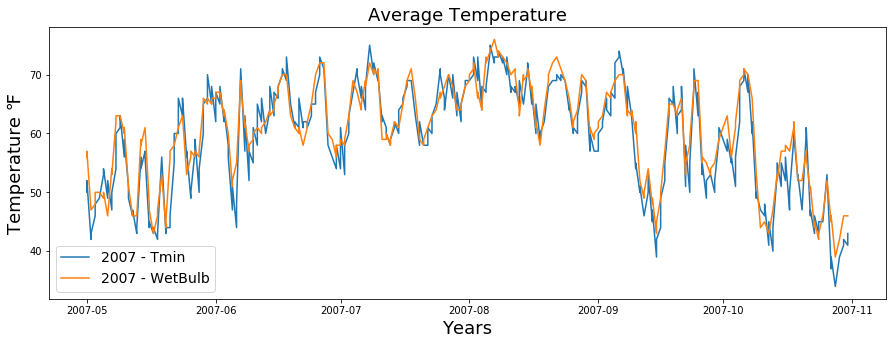

In [83]:
f, ax = plt.subplots(figsize = (15, 5))
plt.title('Average Temperature', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Temperature ℉', fontsize = 18)
# plt.plot(df['2007'].Tavg, label='2007 - TAvg')
# plt.plot(df['2007'].DewPoint, label='2007 - DewPoint')
plt.plot(df['2007'].Tmin, label='2007 - Tmin')
plt.plot(df['2007'].WetBulb, label='2007 - WetBulb')

# plt.plot(df['2009'].Tavg, label='2009 - TAvg')
# plt.plot(df['2011'].Tavg, label='2011 - TAvg')
# plt.plot(df['2013'].Tavg, label='2013 - TAvg')
plt.legend(loc='best', fontsize = 14);

In [84]:
station1_df = df[df.Station == 1]
station2_df = df[df.Station == 2]

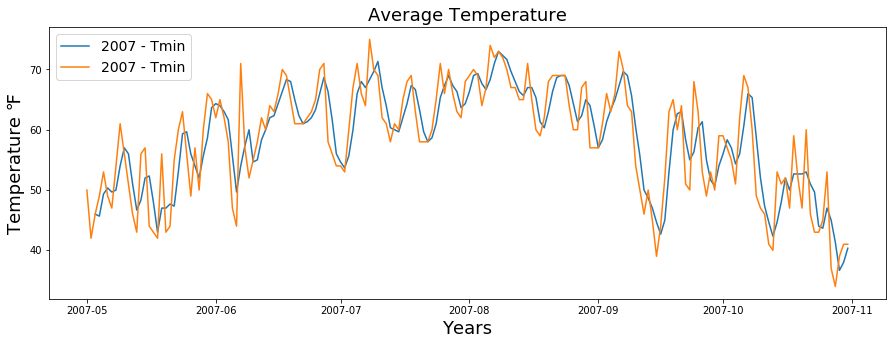

In [85]:
f, ax = plt.subplots(figsize = (15, 5))
plt.title('Average Temperature', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Temperature ℉', fontsize = 18)
# plt.plot(df['2007'].Tavg, label='2007 - TAvg')
# plt.plot(df['2007'].DewPoint, label='2007 - DewPoint')
plt.plot(station1_df['2007'].Tmin.rolling(3).mean(), label='2007 - Tmin')
plt.plot(station1_df['2007'].Tmin, label='2007 - Tmin')

# plt.plot(df['2009'].Tavg, label='2009 - TAvg')
# plt.plot(df['2011'].Tavg, label='2011 - TAvg')
# plt.plot(df['2013'].Tavg, label='2013 - TAvg')
plt.legend(loc='best', fontsize = 14);

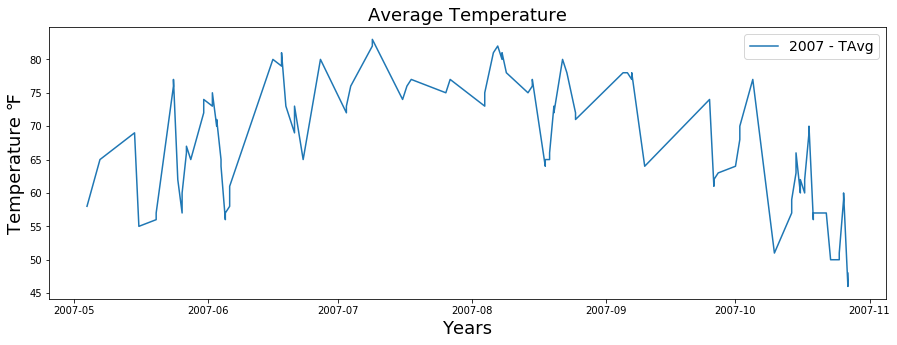

In [86]:
f, ax = plt.subplots(figsize = (15, 5))
plt.title('Average Temperature', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Temperature ℉', fontsize = 18)
plt.plot(df[df.RA == 1]['2007'].Tavg, label='2007 - TAvg')
plt.legend(loc='best', fontsize = 14);

#The graph below show the average temperature recorded in 2007. 
#You can see that the highest average temperature is around the month of August.

## Saving the dataframe to be used in the other Jupyter Notebooks

In [87]:
# This is the code to save the dataframe. It is currently commented out to prevent overwriting the original file.
#df.to_csv('../data/clean_weather_df_NP.csv')

### NOTES on Life cycle of Mosquitoes

https://www.orkin.com/other/mosquitoes/mosquito-life-cycle/